In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
def Loss_funtion(Weight, Bias, data):    
    H_Pred = []
    for W in data['Weight']:
        H_Pred.append(((Weight * W) + Bias))
        
    loss = np.array(data['Height']) - np.array(H_Pred)
    
    total_loss = sum(pow(loss,2))/len(loss)

    return loss, total_loss

In [4]:

def Update_Weight(old_Weight, old_Bias, loss, Learning_rate, data):
    
    n = len(data)
    
    # Weight 
    dw = - (2 * sum(loss * data))/n
    
    # Bias
    dl = - (2 * sum(loss))/n    
    
    new_Weight = (old_Weight - (Learning_rate * dw))
    
    new_Bias = (old_Bias - (Learning_rate * dl))
    
    return new_Weight, new_Bias    
    

In [5]:
Weight = 10
Bias = 20
Learning_rate = 0.0001
epoch = 0

while True:
    
    loss, total_loss = Loss_funtion(Weight, Bias, df)
    
    if total_loss <= 50:
        break
    else:
        new_Weight, new_Bias = Update_Weight(old_Weight=Weight, old_Bias= Bias, loss=loss, Learning_rate=Learning_rate, data= df['Weight'].values)
        Weight= new_Weight
        Bias = new_Bias
        epoch = epoch + 1
    

In [6]:
y_pred = (np.array(df['Weight']) * new_Weight) + Bias

Text(0, 0.5, 'Height')

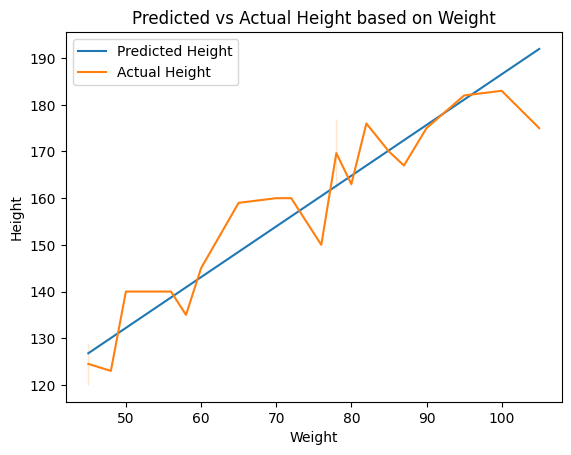

In [7]:
sns.lineplot(x=df['Weight'], y=y_pred, label='Predicted Height')
sns.lineplot(x=df['Weight'], y=df['Height'], label='Actual Height')

# Add title and labels
plt.title('Predicted vs Actual Height based on Weight')
plt.xlabel('Weight')
plt.ylabel('Height')

In [8]:
print(f'The Slop : {new_Weight}')
print(f'The  Bias : {new_Bias}')

The Slop : 1.0864551942769807
The  Bias : 77.89328674992457
